In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
corr=df.corr()

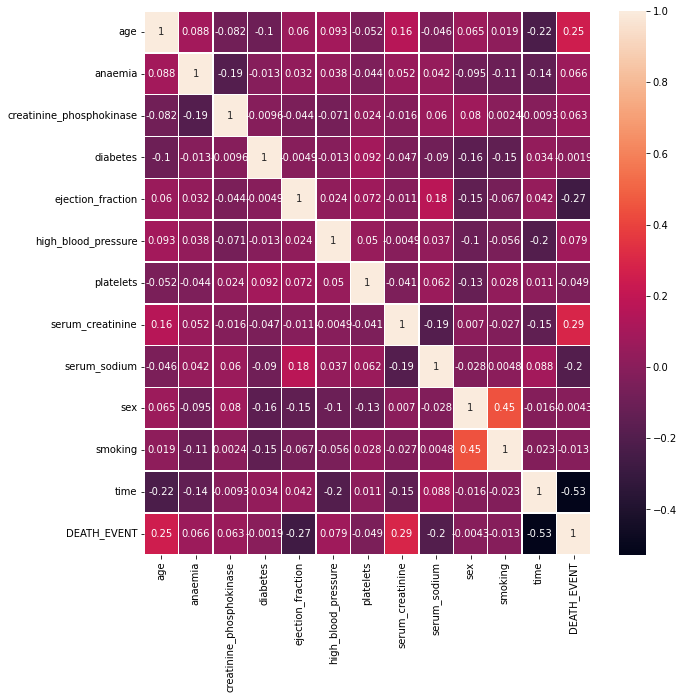

In [7]:
plt.subplots(figsize=(10,10))
sns.heatmap(data=corr,annot=True, linewidths=0.5)

In [8]:
df.drop(labels=['diabetes','sex'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   high_blood_pressure       299 non-null    int64  
 5   platelets                 299 non-null    float64
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   smoking                   299 non-null    int64  
 9   time                      299 non-null    int64  
 10  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 25.8 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y=list(df['DEATH_EVENT'])

In [12]:
df.drop(labels='DEATH_EVENT', axis=1, inplace=True)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(df, y, test_size=0.2, random_state=2)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 53 to 168
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   ejection_fraction         239 non-null    int64  
 4   high_blood_pressure       239 non-null    int64  
 5   platelets                 239 non-null    float64
 6   serum_creatinine          239 non-null    float64
 7   serum_sodium              239 non-null    int64  
 8   smoking                   239 non-null    int64  
 9   time                      239 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 20.5 KB


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 179 to 205
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       60 non-null     float64
 1   anaemia                   60 non-null     int64  
 2   creatinine_phosphokinase  60 non-null     int64  
 3   ejection_fraction         60 non-null     int64  
 4   high_blood_pressure       60 non-null     int64  
 5   platelets                 60 non-null     float64
 6   serum_creatinine          60 non-null     float64
 7   serum_sodium              60 non-null     int64  
 8   smoking                   60 non-null     int64  
 9   time                      60 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 5.2 KB


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

In [17]:
log_reg=LogisticRegression()

In [18]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_predict=log_reg.predict(X_test)

In [20]:
accuracy_score(y_test, y_predict)

0.8666666666666667

In [22]:
cm=confusion_matrix(y_test, y_predict)

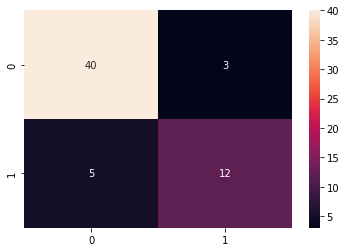

In [23]:
sns.heatmap(cm, annot=True)